In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import chutes_simulation
import random

%matplotlib inline
plt.rcParams['savefig.dpi'] = 120

#Part A

In [2]:
def propagator(ladders, chutes, goal):
    M = np.zeros((goal + 1, goal + 1))
    M[goal, goal] = 1
    M[goal, goal-6:goal] = np.array([1., 2., 3., 4., 5., 6.]) / 6.
    for i in range(1, goal):
        M[i, max(0, i-6):i] = 1./6.
    
    L = M.copy()
    cnl = [(start, end) for start, end in itertools.chain(ladders, chutes)]
    
    for start, dest in cnl:
        L[start, :] = 0.
        L[dest, :] += M[start, :]
    
    return L

def evolve(propagator, num_moves, initial=None):
    p = np.zeros((len(propagator), num_moves))
    if initial is None:
        p[0, 0] = 1
    else:
        p[:, 0] = initial
    
    for k in range(1, num_moves):
        p[:, k] = np.dot(propagator, p[:, k-1])
    
    return p

def arrival_dist(p):
    Q = p[len(p)-1, :]
    q = np.zeros_like(Q)
    q[1:] = np.diff(Q)
    return q, Q

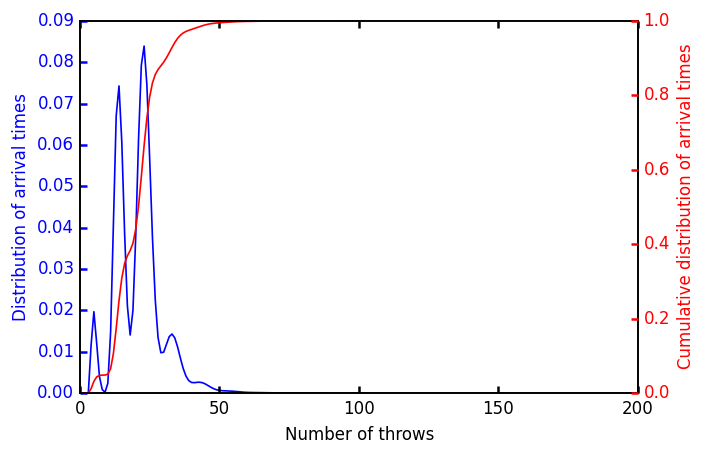

In [82]:
fig, host = plt.subplots()
par1 = host.twinx()

prop = propagator([(1, 35), (45, 78)], [(56, 21)], 80)
pdist = evolve(prop, 200)

q, Q = arrival_dist(pdist)
p1, = host.plot(q, "b-");
p2, = par1.plot(Q, "r-");

host.set_xlabel("Number of throws")
host.set_ylabel("Distribution of arrival times")
par1.set_ylabel("Cumulative distribution of arrival times")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

#Part B
Reproduction of lecture results

In [25]:
l = [(1, 40), (8, 10), (36, 52), (43, 62), (49, 79), (65, 82), (68, 85)]
c = [(24, 5), (33, 3), (42, 30), (56, 37), (64, 27), (74, 12), (87, 70)]

prop = propagator(l, c, 90)
pdist = evolve(prop, 200)
q, Q = arrival_dist(pdist)

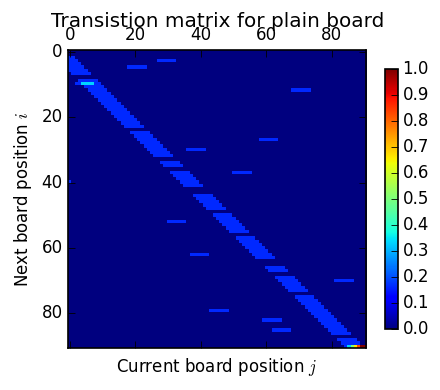

In [26]:
plt.matshow(prop);
plt.xlabel('Current board position $j$');
plt.ylabel('Next board position $i$');
plt.title('Transistion matrix for plain board');
ax = plt.colorbar(shrink=0.7);

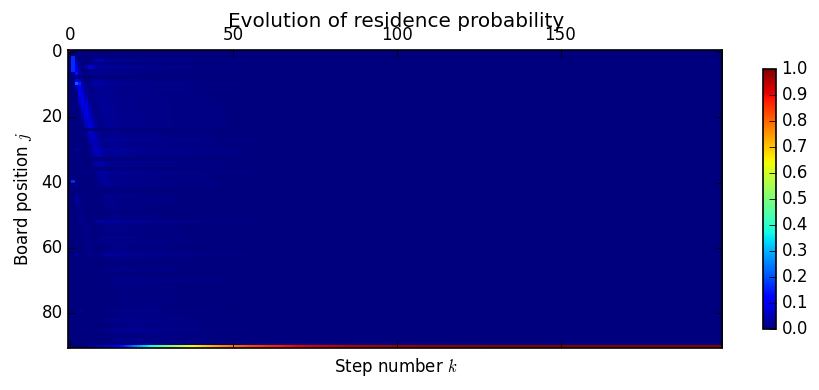

In [27]:
plt.matshow(pdist);
plt.xlabel('Step number $k$');
plt.ylabel('Board position $j$');
plt.title('Evolution of residence probability');
ax = plt.colorbar(shrink=0.7);

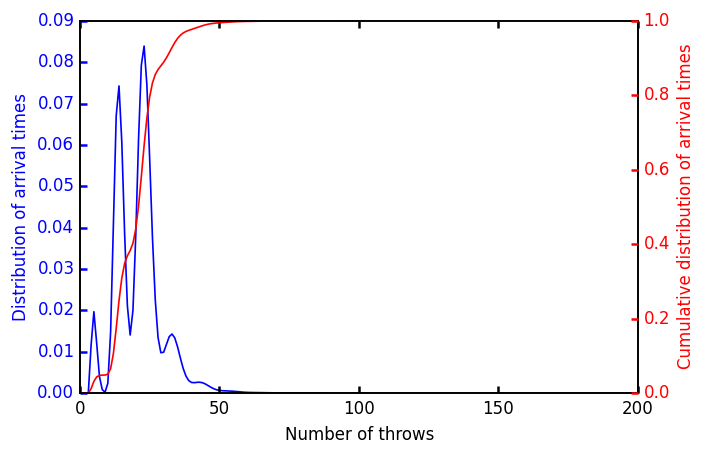

In [83]:
fig, host = plt.subplots()
par1 = host.twinx()

q, Q = arrival_dist(pdist)
p1, = host.plot(q, "b-");
p2, = par1.plot(Q, "r-");

host.set_xlabel("Number of throws")
host.set_ylabel("Distribution of arrival times")
par1.set_ylabel("Cumulative distribution of arrival times")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

#Part C

In [29]:
l = [(1, 40), (8, 10), (36, 52), (43, 62), (49, 79), (65, 82), (68, 85)]
c = [(24, 5), (33, 3), (42, 30), (56, 37), (64, 27), (74, 12), (87, 70)]

board = chutes_simulation.Board(ladders=l, chutes=c, goal=90 )
sim = chutes_simulation.Simulation([chutes_simulation.Player])
sim.run_simulation(10000)

durations = sim.durations_per_type()[chutes_simulation.Player]
qE = np.zeros((max(durations) + 1), dtype=float)

for n in frozenset(durations):
    qE[n] = durations.count(n)
    
qE /= len(durations)

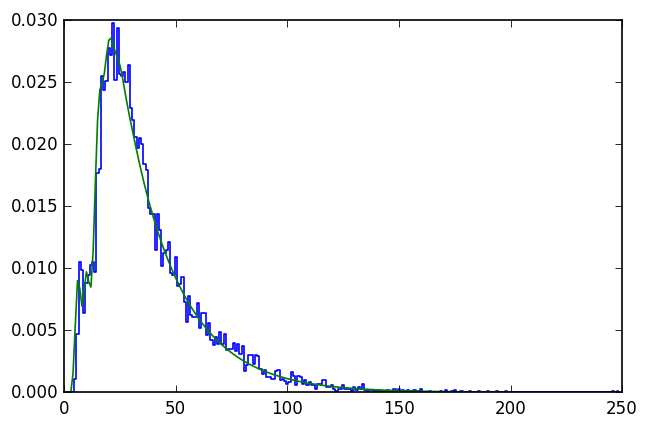

In [30]:
plt.step(range(len(qE)), qE, where='mid', label='Simulation');
plt.plot(q);

#Part D

*Innledning* <br/>
I denne simuleringen ønsker jeg å undersøke hvordan stiger og sklier påvirker fordelingen av antall trekk man trenger for å fulføre en runde med stigespillet. For å se hvilken effekt stiger og sklier har, lager jeg to forskjellige brett hvor i det ene har jeg lagt inn stiger på hvert tiende felt i intervallet {10-481} med en lengde på 11. På det andre brettet har jeg lagt inn sklier på de samme stedene som det første brettet med samme lengde. Som refferanse bruker jeg et tomt brett og ser hvordan fordelingen av spillenes lengde påvirkes ved å legge til stiger eller sklier. Jeg har valgt å sette mål i denne simuleringen til 500 for å få et høyt antall stiger/sklier på brettet

In [15]:
goal = 500
throws = 300

"""
Board without any chutes and ladders
"""
e_prop = propagator([], [], goal)
e_pdist = evolve(e_prop, throws)
e_q, e_Q = arrival_dist(e_pdist)


"""
Board with only ladders
"""
l_prop = propagator([(l, l + 11) for l in range(10, goal - 19, 10)], [], goal)
l_pdist = evolve(l_prop, throws)
l_q, l_Q = arrival_dist(l_pdist)


"""
Board with only chutes
"""
c_prop = propagator([], [(l + 11, l) for l in range(10, goal - 19, 10)], goal)
c_pdist = evolve(c_prop, throws)
c_q, c_Q = arrival_dist(c_pdist)

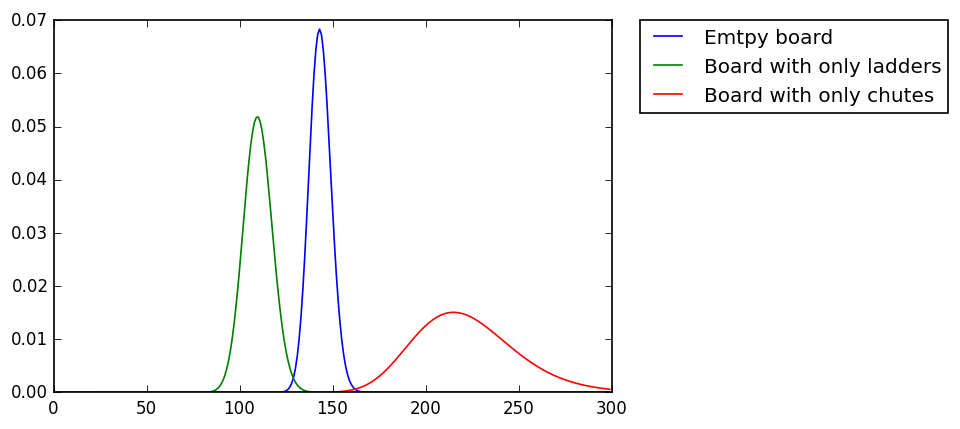

In [16]:
plt.plot(e_q, label="Emtpy board");
plt.plot(l_q, label="Board with only ladders");
plt.plot(c_q, label="Board with only chutes");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

*Resultater* <br />
Som man kan se fra figuren over vil de å legge til bare stiger på et brett redusere forventet lengde av spillene, mens lengden vil øke om man legger til sklier. Brettet uten stiger eller sklier har det minste standardaviket. Spillet som tilsynelatende blir mest påvirket av endringene er brettet med kun sklier. Trolig er dette tilfelle da man kan falle ned en sklie, for og så falle ned en ny sklie i trekket etter.
<br /><br />

#Part E
Viser fram propagnator matrisen for et brett med mål på den tiende ruten for begge scenarioene, for å lett vise effekten av de endrede reglene

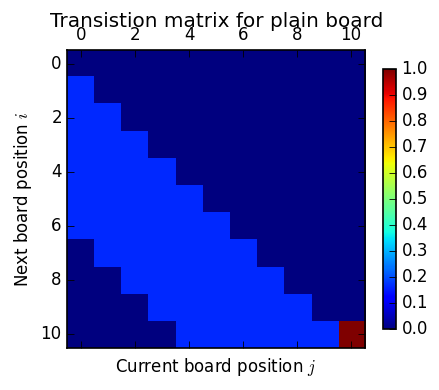

In [96]:
"""
Function where player have to wait if move past goal if dice shows more
than player has fields left to finish
"""

def propagator_wait(ladders, chutes, goal):
    M = np.zeros((goal + 1, goal + 1))
    M[goal, goal] = 1
    M[goal, goal-6:goal] = np.array([1., 1., 1., 1., 1., 1.]) / 6.
    
    for i in range(1, goal):
        M[i, max(0, i-6):i] = 1./6.
    
    L = M.copy()
    cnl = [(start, end) for start, end in itertools.chain(ladders, chutes)]
    
    for start, dest in cnl:
        L[start, :] = 0.
        L[dest, :] += M[start, :]
    
    return L

prop = propagator_wait([], [], 10)

plt.matshow(prop);
plt.xlabel('Current board position $j$');
plt.ylabel('Next board position $i$');
plt.title('Transistion matrix for plain board');
ax = plt.colorbar(shrink=0.7);


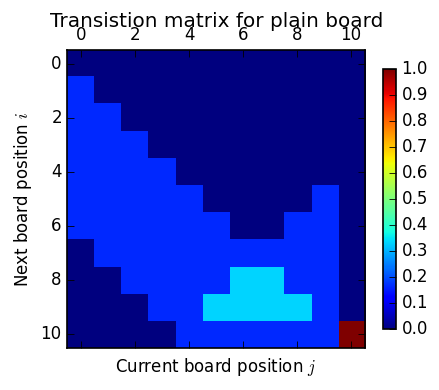

In [10]:
"""
Function to make propagator matrix for game where player have to turn back
and continue walking until he has moved as many field as dice shows.
"""

def propagator_back(ladders, chutes, goal):
    M = np.zeros((goal + 1, goal + 1))
    M[goal, goal] = 1
    for i in range(1, goal):
        M[i, max(0, i-6):i] = 1./6.
    
    for i in range (0, 6):
        M[goal - i, goal - (6-i):goal] +=  np.ones((6-i)) / 6
    
    L = M.copy()
    cnl = [(start, end) for start, end in itertools.chain(ladders, chutes)]
    
    for start, dest in cnl:
        L[start, :] = 0.
        L[dest, :] += M[start, :]
    
    return L

prop = propagator_back([], [], 10)

plt.matshow(prop);
plt.xlabel('Current board position $j$');
plt.ylabel('Next board position $i$');
plt.title('Transistion matrix for plain board');
ax = plt.colorbar(shrink=0.7);


##Sources:
    
    http://matplotlib.org/1.5.0/examples/pylab_examples/multiple_yaxis_with_spines.html
        (15.11.2015)